In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header = 0)

In [7]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
df.shape

(851264, 7)

In [9]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [13]:
df_yahoo = df[df['symbol']=='YHOO']

In [14]:
df_yahoo.head()
df_yahoo.shape


(1762, 7)

In [19]:
df_yahoo.describe()
df_yahoo.isnull().sum()


date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [20]:
df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])
print(df_yahoo.date.dtype)

df_yahoo = df_yahoo.set_index("date")
df_yahoo.head()


datetime64[ns]


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [24]:
print(df_yahoo.shape)

yahoo_data = df_yahoo.asfreq('b')

print(yahoo_data.shape)

yahoo_data.tail(30)

yahoo_data.isnull().sum()


(1762, 6)
(1825, 6)


symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [28]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

null_data.head()

null_dates = null_data.index.tolist()


In [32]:
import calendar
import datetime
import pandas as pd

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month == 1:
        if day == 1:
            # New Year Day
            holidays.append(date)
        elif day == 2 and week_day == 'Monday':
            # Observed New Year Day
            holidays.append(date)
        elif 15 <= day <= 21 and week_day == 'Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month == 2:
        # Washington's Birthday
        if 15 <= day <= 21 and week_day == 'Monday':
            holidays.append(date)

    elif month == 5:
        # Memorial Day
        if 25 <= day <= 31 and week_day == 'Monday':
            holidays.append(date)

    elif month == 7:
        # Independence Day
        if day == 4:
            holidays.append(date)
        elif day == 5 and week_day == 'Monday':
            # Observed Independence Day
            holidays.append(date)
        elif day == 3 and week_day == 'Friday':
            holidays.append(date)

    elif month == 9:
        # Labor Day
        if 1 <= day <= 7 and week_day == 'Monday':
            holidays.append(date)

    elif month == 11:
        # Thanksgiving Day
        if week_day == 'Thursday' and 22 <= day <= 28:
            holidays.append(date)

    elif month == 12:
        # Christmas Day
        if day == 25:
            holidays.append(date)
        elif day == 24 and week_day == 'Friday':
            # Observed Christmas Day
            holidays.append(date)
        elif day == 26 and week_day == 'Monday':
            holidays.append(date)

# List of Good Fridays (specific dates)
good_fridays = [
    datetime.date(2010, 4, 2),
    datetime.date(2011, 4, 22),
    datetime.date(2012, 4, 6),
    datetime.date(2013, 3, 29),
    datetime.date(2014, 4, 18),
    datetime.date(2015, 4, 3),
    datetime.date(2016, 3, 25)
]

# Convert Good Fridays to pandas datetime and add to holidays
holidays.extend([pd.to_datetime(date) for date in good_fridays])

# Get non-holidays - dates in null_dates that are NOT holidays
non_holidays = [x for x in null_dates if x not in holidays]

print("Non-holiday missing dates:")
print(non_holidays)


Non-holiday missing dates:
[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [39]:
print(yahoo_data.shape)

modified_df = yahoo_data.drop(holidays)

print(modified_df.shape)



(1825, 6)
(1764, 6)


In [42]:
print("Before filling missing values:\n", modified_df.isna().sum())

modified_df = modified_df.bfill(axis='rows')

print("\nAfter filling missing values:\n", modified_df.isna().sum())


Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


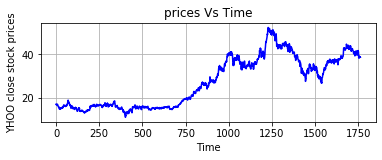

In [45]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

In [49]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining * 0.50)
n_test = n_remaining - n_val

print("Train samples:", n_train, "Validation Samples:", n_val, "Test Samples:", n_test)

# Slice closing_stock to create train_data
train_data = closing_stock[0:n_train]
print(train_data.shape)

# Slice closing_stock to create val_data
val_data = closing_stock[n_train:n_train + n_val]
print(val_data.shape)

# Slice closing_stock to create test_data
test_data = closing_stock[n_train + n_val:]
print(test_data.shape)


Train samples: 1411 Validation Samples: 176 Test Samples: 177
(1411, 1)
(176, 1)
(177, 1)


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)


In [63]:
def create_dataset(data, n_features):
    dataX, dataY = [], []
    for i in range(len(data) - n_features - 1):
        a = data[i:(i + n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

n_features = 2

trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

print(trainX.shape, trainY.shape, valX.shape, valY.shape, testX.shape, testY.shape)

trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
valX = valX.reshape(valX.shape[0], 1, valX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

print(trainX.shape, trainY.shape, valX.shape, valY.shape, testX.shape, testY.shape)


(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)
(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


In [71]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()

# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1, n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0005), metrics=['mean_squared_error'])

print(model.summary())

history = model.fit(trainX, trainY, epochs=100, batch_size=128, verbose=1, validation_data=(valX, valY))


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [77]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00019 , RMSE: 0.01
Validation Score:
MSE: 0.00034 , RMSE: 0.02
Test Score:
MSE: 0.00024 , RMSE: 0.02


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


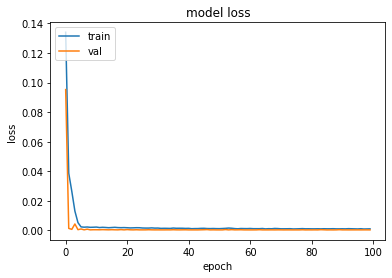

In [80]:
print(history.history.keys())

plt.plot(history.history['loss'])              # plotting train loss
plt.plot(history.history['val_loss'])          # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


[[37.531864]
 [37.306572]
 [37.149067]
 [37.005184]
 [36.715366]
 [36.610035]
 [36.56642 ]
 [36.19725 ]
 [36.02839 ]
 [36.65329 ]]
[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


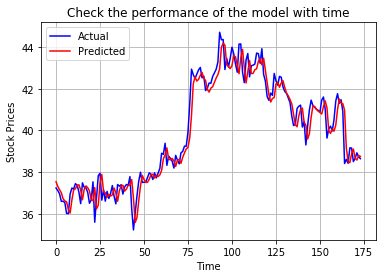

In [81]:
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)
print(pred[:10])

testY_actual = testY.reshape(testY.shape[0], 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

plt.plot(testY_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()
